In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
lib = pd.read_csv('./data/r_liberal.csv')
con = pd.read_csv('./data/r_conservative.csv')

In [3]:
def df_word_count(x):
    keep_columns = ['subreddit', 'title',  'author', 'domain', 'id', 'num_comments', 
                'score', 'selftext', 'url']
    x = x[keep_columns]
    x['title_word_count'] = [len(title.split()) for title in x['title']]
    return x

In [4]:
lib = df_word_count(lib)
con = df_word_count(con)

<ipython-input-3-ab5e781bc984>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['title_word_count'] = [len(title.split()) for title in x['title']]


In [5]:
lib.head()

,subreddit,title,author,domain,id,num_comments,score,selftext,url,title_word_count
0,Liberal,"On behalf of my neanderthal ancestors, I object!",MisanthropicScott,self.Liberal,ly2nha,0,1,[removed],https://www.reddit.com/r/Liberal/comments/ly2n...,8
1,Liberal,You Can't Change This Hatred—You Have to Outnu...,moochir,johnpavlovitz.com,lxy58f,19,181,NaN,https://johnpavlovitz.com/2018/08/07/you-cant-...,9
2,Liberal,Black teen fails all but 3 classes in 4 years ...,XiLin02,foxbaltimore.com,lxx3np,0,1,NaN,https://foxbaltimore.com/news/project-baltimor...,23
3,Liberal,How The Press Enables The GOP’s Big Lie,NORDLAN,nationalmemo.com,lxvws3,0,1,NaN,https://www.nationalmemo.com/election-2020-lies-,8
4,Liberal,Russian State TV Is Really Missing Trump Now B...,NORDLAN,thedailybeast.com,lxvnt0,2,5,NaN,https://www.thedailybeast.com/russian-state-tv...,11


Text(0, 0.5, 'Count')

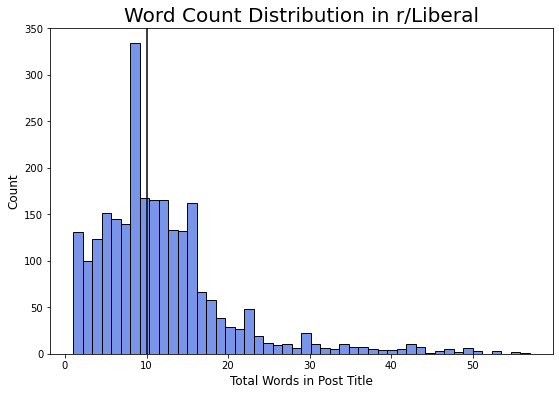

In [6]:
plt.figure(figsize=(9,6))
sns.histplot(lib['title_word_count'], color='royalblue', alpha=0.7)
plt.axvline(lib['title_word_count'].median(), color='black')
plt.title('Word Count Distribution in r/Liberal', size=20)
plt.xlabel('Total Words in Post Title', size=12);
plt.ylabel('Count', size=12)

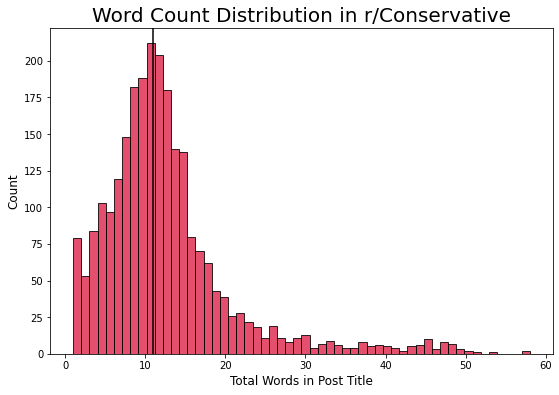

In [7]:
plt.figure(figsize=(9,6))
sns.histplot(con['title_word_count'], color='crimson')
plt.axvline(con['title_word_count'].median(), color='black')
plt.title('Word Count Distribution in r/Conservative', size=20)
plt.xlabel('Total Words in Post Title', size=12);
plt.ylabel('Count', size=12);

In [8]:
lib_cv = CountVectorizer(stop_words='english')
lib_count = lib_cv.fit_transform(lib['title'])
lib_top_25 = pd.DataFrame(lib_count.sum(axis=0), columns=lib_cv.get_feature_names()).T.sort_values(0, ascending=False).head(25)
lib_top_25

,0
trump,560
biden,258
election,145
capitol,110
liberal,88
president,75
republicans,71
vote,68
people,68
joe,67


In [9]:
con_cv = CountVectorizer(stop_words='english')
con_count = con_cv.fit_transform(con['title'])
con_top_25 = pd.DataFrame(con_count.sum(axis=0), columns=con_cv.get_feature_names()).T.sort_values(0, ascending=False).head(25)
con_top_25

,0
biden,375
trump,182
covid,157
cuomo,113
new,107
house,107
says,102
white,100
dr,86
texas,86


In [10]:
print(set(lib_top_25.index).intersection(set(con_top_25.index)))

{'trump', 'new', 'capitol', 'covid', 'white', 'biden', 'people', 'joe', 'election', 'says'}


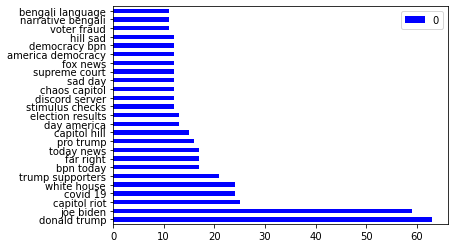

In [11]:
lib_cvec_ngram = CountVectorizer(ngram_range=(2,2), stop_words='english')
lib_ngram = lib_cvec_ngram.fit_transform(lib.title)
lib_bigrams = pd.DataFrame(lib_ngram.sum(axis=0), columns=lib_cvec_ngram.get_feature_names()).T.sort_values(0, ascending=False).head(25)
lib_bigrams.plot(kind='barh', color='blue');

In [12]:
con_cvec_ngram = CountVectorizer(ngram_range=(2,2), stop_words='english')
con_ngram = con_cvec_ngram.fit_transform(con.title)
con_bigrams = pd.DataFrame(con_ngram.sum(axis=0), columns=con_cvec_ngram.get_feature_names()).T.sort_values(0, ascending=False).head(25)

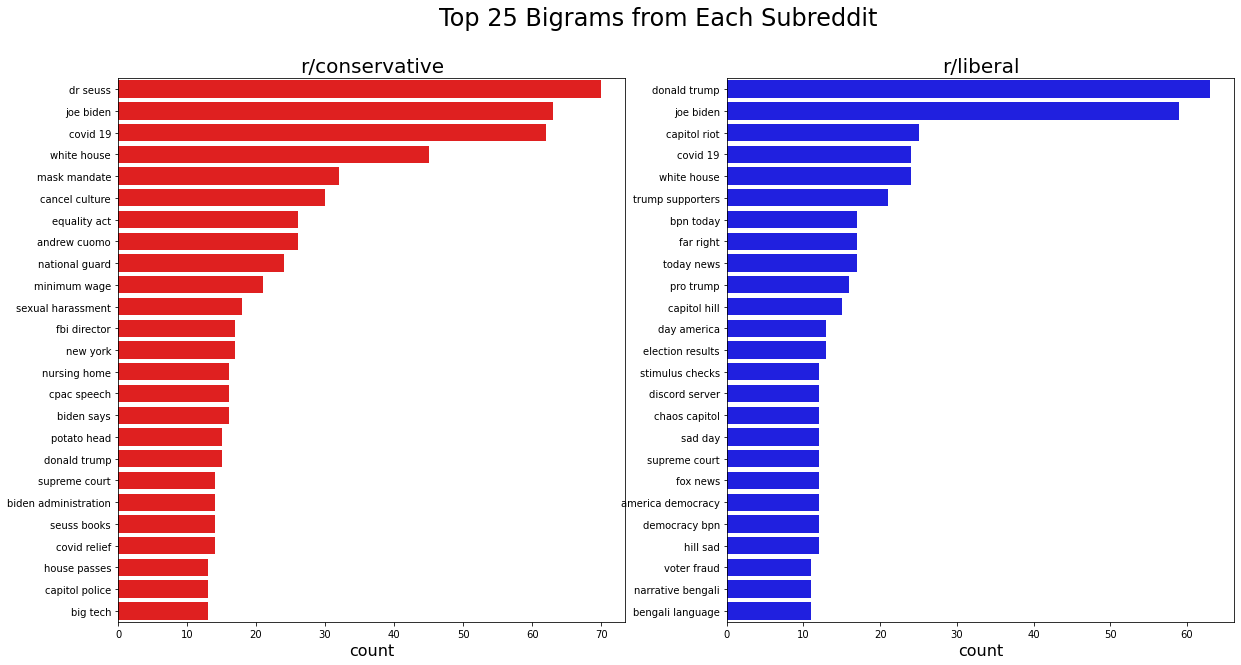

In [13]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.barplot(ax=ax[0], data=con_bigrams, y=con_bigrams.index, x=con_bigrams.columns[0], color='r');
sns.barplot(ax=ax[1], data=lib_bigrams, y=lib_bigrams.index, x=lib_bigrams.columns[0], color='b');
fig.suptitle('Top 25 Bigrams from Each Subreddit', size=24)
ax[0].set_title('r/conservative', size=20)
ax[1].set_title('r/liberal', size=20)
ax[0].set_xlabel('count', size=16)
ax[1].set_xlabel('count', size=16);

In [14]:
lib_50 = pd.DataFrame(lib_count.sum(axis=0), columns=lib_cv.get_feature_names()).T.sort_values(0, ascending=False).head(50)
con_50 = pd.DataFrame(con_count.sum(axis=0), columns=con_cv.get_feature_names()).T.sort_values(0, ascending=False).head(50)


In [15]:
print(set(lib_50.index).intersection(set(con_50.index)))

{'police', 'president', 'gop', 'house', 'new', 'election', 'biden', 'covid', 'capitol', 'time', 'want', 'video', 'trump', 'senate', 'white', 'people', 'joe', 'just', 'black', 'democrats', 'america', 'conservative', 'left', 'says'}


In [16]:
lib_author = pd.DataFrame(lib.author.value_counts().reset_index().values, columns=['author', 'number_of_posts'])
lib_author.drop(labels=1, axis=0, inplace=True)
lib_author.reset_index(drop=True, inplace=True)
lib_author.head(10)

,author,number_of_posts
0,Walk1000Miles,112
1,Havvocck2,88
2,spaceghoti,60
3,bugleweed,37
4,javaxcore,36
5,Wong_John,30
6,Newman1651,23
7,walter1950,19
8,progress18,19
9,praguer56,19


In [17]:
con_author = pd.DataFrame(con.author.value_counts().reset_index().values, columns=['author', 'number_of_posts'])
con_author.drop(labels=1, axis=0, inplace=True)
con_author.reset_index(drop=True, inplace=True)
con_author.head(10)

,author,number_of_posts
0,SpaceRocker420,250
1,canfbar,82
2,Winterhold2000,79
3,guanaco55,76
4,nimobo,69
5,Foubar_ghost,56
6,crap_eagle,54
7,f1sh98,54
8,johntwit,44
9,JPRedScot,39


In [18]:
len(list(set(con_author['author']).intersection(set(lib_author['author']))))

17

In [19]:
pd.set_option('display.max_colwidth', None)

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline

In [21]:
nltk = SentimentIntensityAnalyzer()
bert = pipeline('sentiment-analysis')

In [22]:
con['compound_sentiment'] = [nltk.polarity_scores(i)['compound'] for i in con['title']]
con[['compound_sentiment']]

,compound_sentiment
0,0.0000
1,0.5106
2,-0.4019
3,-0.5411
4,0.0000
...,...
2495,0.0000
2496,0.0000
2497,0.0000
2498,0.0000


In [23]:
# lib['sentiment'] = [sent.polarity_scores(i) for i in lib['title']]
lib['compound_sentiment'] = [nltk.polarity_scores(x)['compound'] for x in lib['title']]
# lib[['subreddit', 'title', 'score', 'sentiment']].head(1)
lib.head()

,subreddit,title,author,domain,id,num_comments,score,selftext,url,title_word_count,compound_sentiment
0,Liberal,"On behalf of my neanderthal ancestors, I object!",MisanthropicScott,self.Liberal,ly2nha,0,1,[removed],https://www.reddit.com/r/Liberal/comments/ly2nha/on_behalf_of_my_neanderthal_ancestors_i_object/,8,0.0000
1,Liberal,You Can't Change This Hatred—You Have to Outnumber It,moochir,johnpavlovitz.com,lxy58f,19,181,NaN,https://johnpavlovitz.com/2018/08/07/you-cant-change-hatred-but-you-can-outvote-it/?fbclid=IwAR1SvHCFHvYUrIsrJllAm9fm8YRn-gCZxxBFeoK4cllzxCZY4vmgsqWMeDY,9,0.0000
2,Liberal,Black teen fails all but 3 classes in 4 years of high school. Ranks near top half of class with a 0.13 GPA.,XiLin02,foxbaltimore.com,lxx3np,0,1,NaN,https://foxbaltimore.com/news/project-baltimore/city-student-passes-3-classes-in-four-years-ranks-near-top-half-of-class-with-013-gpa,23,0.0772
3,Liberal,How The Press Enables The GOP’s Big Lie,NORDLAN,nationalmemo.com,lxvws3,0,1,NaN,https://www.nationalmemo.com/election-2020-lies-,8,0.0000
4,Liberal,Russian State TV Is Really Missing Trump Now Biden’s Sanctions Hit,NORDLAN,thedailybeast.com,lxvnt0,2,5,NaN,https://www.thedailybeast.com/russian-state-tv-is-really-missing-trump-now-bidens-sanctions-hit,11,-0.3597


<AxesSubplot:xlabel='compound_sentiment', ylabel='score'>

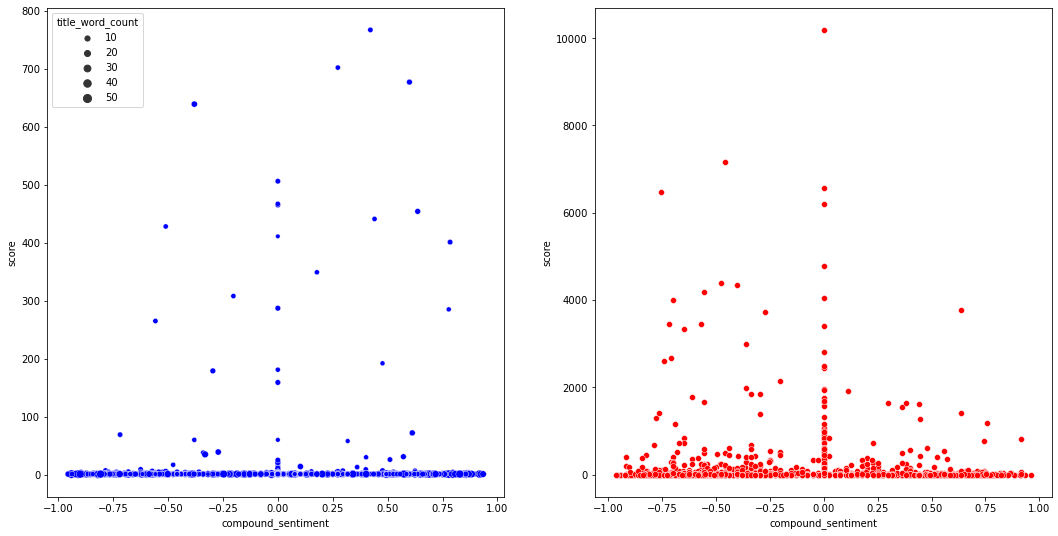

In [24]:
fig, ax = plt.subplots(1,2, figsize=(18,9))

sns.scatterplot(ax=ax[0], data=lib, x='compound_sentiment', y='score', size='title_word_count', color='blue')
sns.scatterplot(ax=ax[1], data=con, x=con['compound_sentiment'], y=con['score'], color='Red')

In [25]:
domain = lib[['subreddit', 'domain']]
domain_c = con[['subreddit', 'domain']]
domain = pd.concat([domain, domain_c])
domain

,subreddit,domain
0,Liberal,self.Liberal
1,Liberal,johnpavlovitz.com
2,Liberal,foxbaltimore.com
3,Liberal,nationalmemo.com
4,Liberal,thedailybeast.com
...,...,...
2495,Conservative,breitbart.com
2496,Conservative,twitter.com
2497,Conservative,v.redd.it
2498,Conservative,vice.com


In [26]:
domain['subreddit'] = domain['subreddit'].apply(lambda x: 1 if x == 'Liberal' else 0)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [28]:
cv = CountVectorizer()
vec = cv.fit_transform(domain['domain'])
vec = pd.DataFrame(vec.todense(), columns=cv.get_feature_names())

In [29]:
domain = domain.reset_index(drop=True)
vec = vec.reset_index(drop=True)
domain = pd.concat([domain, vec], axis=1)
domain

,subreddit,domain,1000grandmothers,100percentfedup,10tv,19fortyfive,4pt,abc7,abc7ny,abcnews,...,yahoo,yale,ydr,yougovblue,yourstake,youtu,youtube,zeep,zerohedge,zodiackillings
0,1,self.Liberal,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,johnpavlovitz.com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,foxbaltimore.com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,nationalmemo.com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,thedailybeast.com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,breitbart.com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,twitter.com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,v.redd.it,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,vice.com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X = domain.drop(columns=['subreddit', 'domain', 'liberal', 'conservative'])
y = domain['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
lr.score(X_train, y_train)

0.8770666666666667

In [33]:
lr.score(X_test, y_test)

0.8232

In [34]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [35]:
bnb.score(X_train, y_train)

0.8728

In [36]:
bnb.score(X_test, y_test)

0.8248

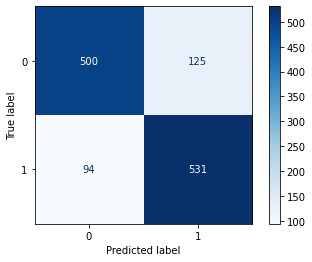

In [37]:
plot_confusion_matrix(bnb, X_test, y_test, cmap='Blues');

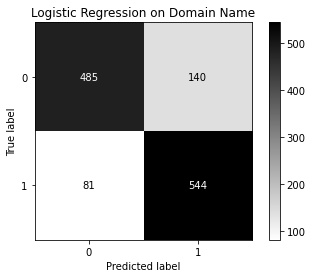

In [38]:
plot_confusion_matrix(lr, X_test, y_test, cmap='binary')
plt.title('Logistic Regression on Domain Name');